In [1]:
!pip install --force-reinstall agent_system/dist/mesa_restaurant_agents-0.0.1-py3-none-any.whl

Processing c:\users\s.neumann\documents\11_master_cas\code\mesa-restaurant-agents\agent_system\dist\mesa_restaurant_agents-0.0.1-py3-none-any.whl
  Using cached mesa-3.1.0-py3-none-any.whl.metadata (9.9 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.2-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached packaging-24.2-py3-none-any.whl.metadata (3.2 kB)
  Using

In [2]:
import mesa
from mesa_restaurant_agents.model.restaurant_model import RestaurantModel

params = {"n_waiters":2, "grid_width":50, "grid_height": 50}

results = mesa.batch_run(
    RestaurantModel,
    parameters=params,
    iterations=5,
    max_steps=10,
    number_processes=1,
    data_collection_period=1,
    display_progress=True,
)
print(results)

  0%|          | 0/5 [00:00<?, ?it/s]

[{'RunId': 0, 'iteration': 0, 'Step': 0, 'n_waiters': 2, 'grid_width': 50, 'grid_height': 50, 'Customer_Count': 1, 'Average_Wait_Time': np.float64(0.0), 'Average_Customer_Satisfaction': np.float64(100.0), 'Profit': np.float64(0.0), 'Customer_Info': [{'customer_nr': 0, 'waiting_time': 0, 'order_status': 0, 'satisfaction': 100}]}, {'RunId': 0, 'iteration': 0, 'Step': 1, 'n_waiters': 2, 'grid_width': 50, 'grid_height': 50, 'Customer_Count': 3, 'Average_Wait_Time': np.float64(0.0), 'Average_Customer_Satisfaction': np.float64(100.0), 'Profit': np.float64(0.0), 'Customer_Info': [{'customer_nr': 0, 'waiting_time': 0.0, 'order_status': 1, 'satisfaction': 100.0}, {'customer_nr': 1, 'waiting_time': 0, 'order_status': 0, 'satisfaction': 100}, {'customer_nr': 2, 'waiting_time': 0, 'order_status': 0, 'satisfaction': 100}]}, {'RunId': 0, 'iteration': 0, 'Step': 2, 'n_waiters': 2, 'grid_width': 50, 'grid_height': 50, 'Customer_Count': 5, 'Average_Wait_Time': np.float64(1.0), 'Average_Customer_Satisfa

[Text(0.5, 1.0, 'Visualization of agents in grid')]

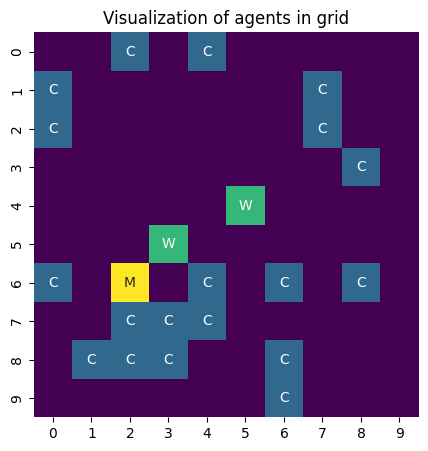

In [15]:
import seaborn as sns
import numpy as np
from mesa_restaurant_agents.agents.customer_agent import CustomerAgent
from mesa_restaurant_agents.agents.manager_agent import ManagerAgent
from mesa_restaurant_agents.agents.waiter_agent import WaiterAgent

model = RestaurantModel(n_waiters=2, grid_width=10, grid_height=10)
for i in range(10):
    model.step()

agents_position = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x, y) in model.grid.coord_iter():
    if len(cell_content) > 0:
        if isinstance(cell_content[0], CustomerAgent):
            agents_position[x][y] = 1
        elif isinstance(cell_content[0], WaiterAgent):
            agents_position[x][y] = 2
        else:
            agents_position[x][y] = 3
    else:
        agents_position[x][y] = 0

mapping = {0: "", 1: "C", 2: "W", 3: "M"}

annot = np.vectorize(mapping.get)(agents_position)
    
# Plot using seaborn, with a visual size of 5x5
g = sns.heatmap(agents_position, cmap="viridis", annot=annot, cbar=False, square=True, fmt="")
g.figure.set_size_inches(5, 5)
g.set(title="Visualization of agents in grid")

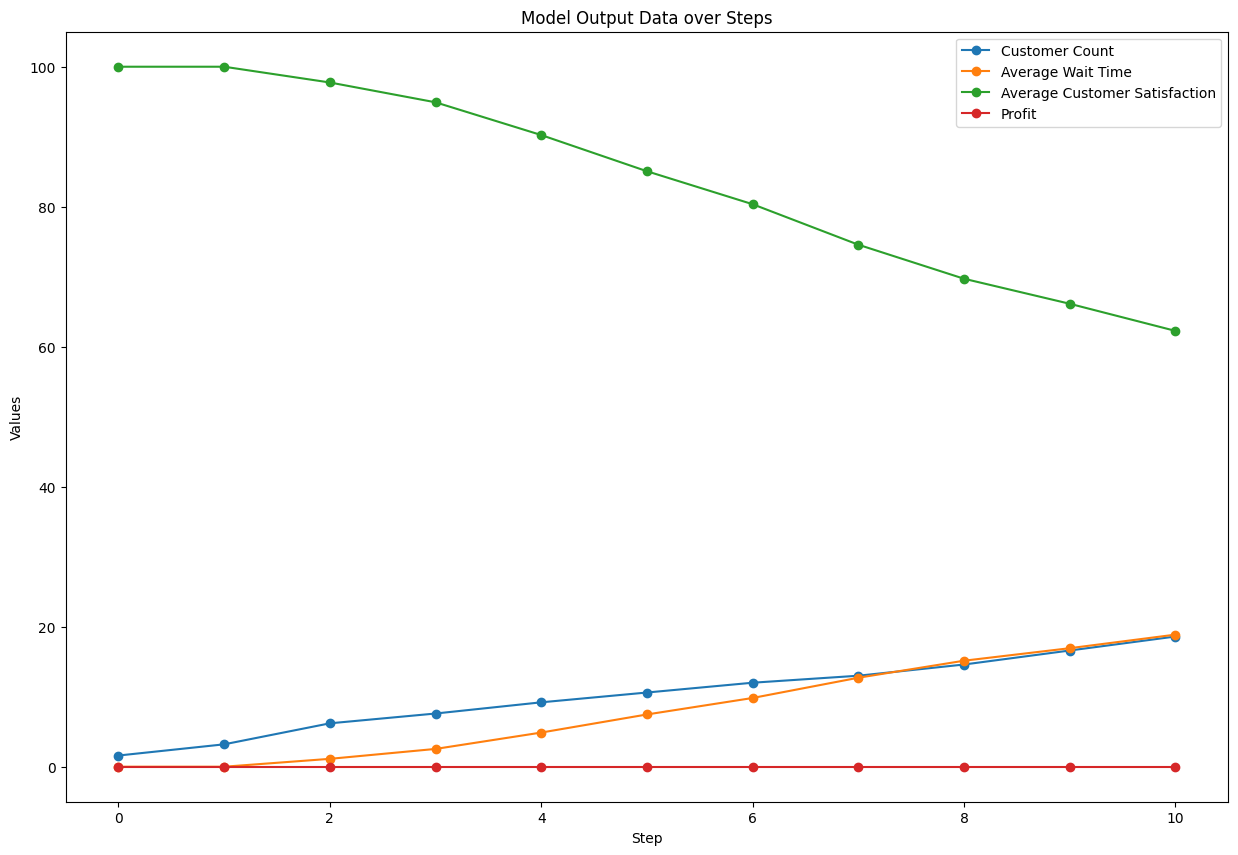

None


None


None


None


In [4]:
from mesa_restaurant_agents.visualization import *

df_mean_step = display_mean_step_results(results)
df_first_run_customer = display_first_run_step_results_customer(results)
df_first_run_waiter = display_first_run_step_results_waiter(results)

In [5]:
df_mean_step

,Step,mean_customer_count,mean_waiting_time,mean_customer_satisfaction,mean_profit
0,0,1.6,0.000000,100.000000,0.0
1,1,3.2,0.000000,100.000000,0.0
2,2,6.2,1.126190,97.747619,0.0
3,3,7.6,2.541667,94.916667,0.0
4,4,9.2,4.880051,90.239899,0.0
5,5,10.6,7.465035,85.069930,0.0
6,6,12.0,9.819481,80.361039,0.0
7,7,13.0,12.711905,74.576190,0.0
8,8,14.6,15.142857,69.714286,0.0
9,9,16.6,16.929972,66.140056,0.0


In [6]:
df_first_run_customer.sort_values(['customer_nr', 'step'])

,customer_nr,waiting_time,order_status,satisfaction,step
0,0,0.0,0,100.0,0
1,0,0.0,1,100.0,1
4,0,5.0,3,90.0,2
9,0,5.0,3,90.0,3
15,0,5.0,3,90.0,4
...,...,...,...,...,...
92,12,5.0,0,90.0,10
65,13,0.0,0,100.0,8
79,13,0.0,0,100.0,9
93,13,5.0,0,90.0,10


In [ ]:
df_first_run_waiter.sort_values(['waiter_nr', 'step'])